In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [22]:
sd = pd.read_csv("sales_data_sample.csv", encoding='cp1252')
sd.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [23]:
sd.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [24]:
sd.shape

(2823, 25)

In [25]:
sd = sd.drop(['ADDRESSLINE1','ADDRESSLINE2','STATUS','POSTALCODE','CITY','TERRITORY'], axis=1)

In [26]:
sd = sd.drop(['CUSTOMERNAME','CONTACTFIRSTNAME','CONTACTLASTNAME','PHONE','PRODUCTCODE'], axis=1)

In [27]:
sd = pd.get_dummies(sd, dtype='float')

In [28]:
sd = sd.drop(columns=['ORDERDATE'], errors='ignore')

In [29]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 306 entries, ORDERNUMBER to DEALSIZE_Small
dtypes: float64(299), int64(7)
memory usage: 6.6 MB


In [31]:
scaler = StandardScaler()
sd_scaled = scaler.fit_transform(sd)

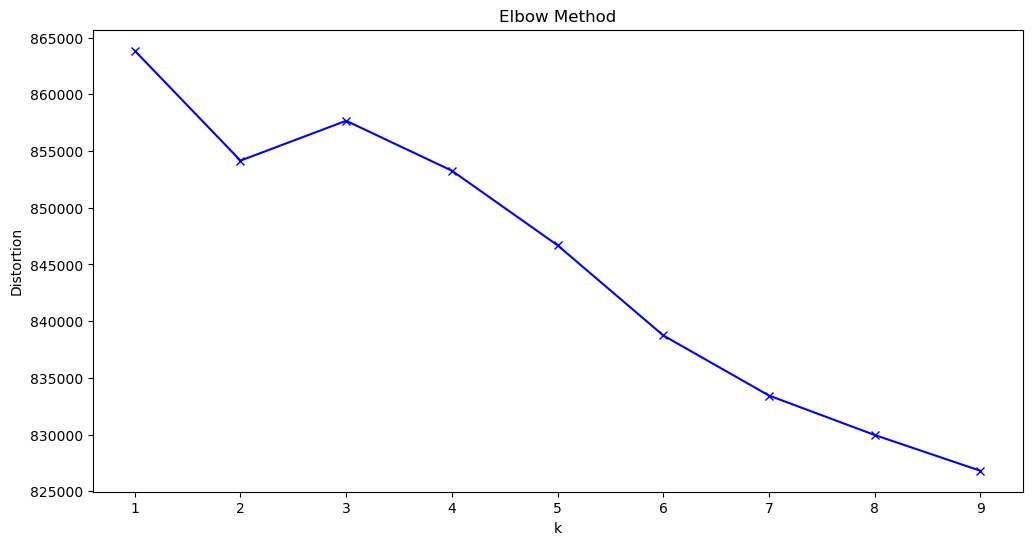

In [32]:
distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(sd_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [33]:
kmean = KMeans(n_clusters=4, random_state=0)
kmean.fit(sd_scaled)

sd['cluster'] = kmean.labels_
sd.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,ORDERDATE_1/10/2003 0:00,...,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,cluster
0,10107,30,95.70,2,2871.00,1,2,2003,95,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
1,10121,34,81.35,5,2765.90,2,5,2003,95,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,10134,41,94.74,2,3884.34,3,7,2003,95,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,10145,45,83.26,6,3746.70,3,8,2003,95,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
4,10159,49,100.00,14,5205.27,4,10,2003,95,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2


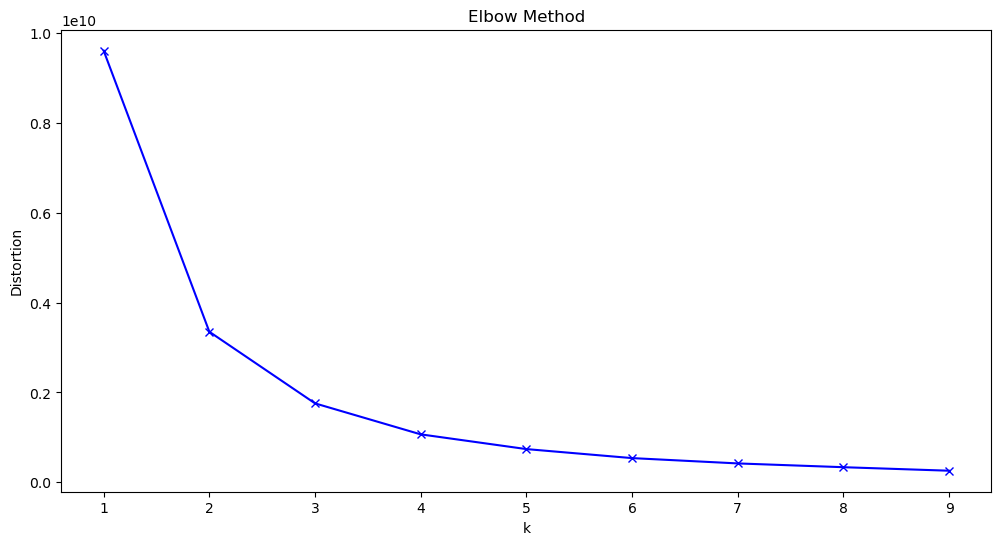

In [40]:
from sklearn.cluster import KMeans
distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(sd)  
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [43]:
kmean = KMeans(n_clusters=4, random_state=0)
kmean.fit(sd_scaled)   
clusters = kmean.labels_

In [44]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(sd_scaled)
centers_pca = pca.transform(kmean.cluster_centers_)

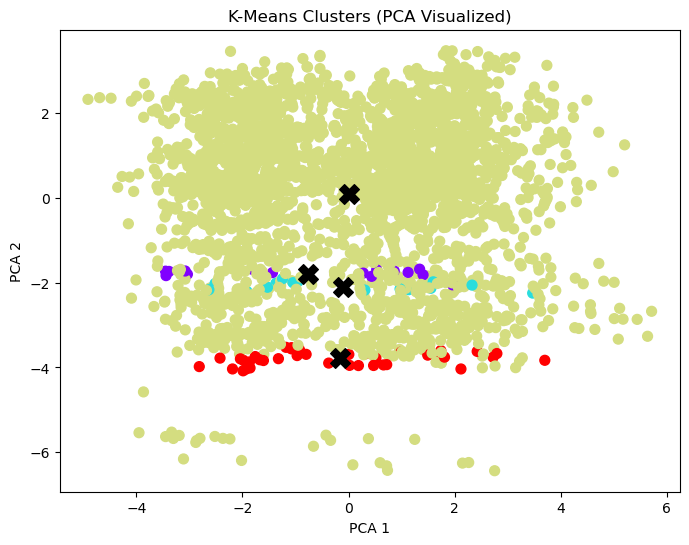

In [48]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(sd_scaled)

# Project cluster centers into PCA space
centers_pca = pca.transform(kmean.cluster_centers_)

# Plot Visualization
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmean.labels_, cmap='rainbow', s=50)
plt.scatter(centers_pca[:,0], centers_pca[:,1], color='black', s=200, marker='X')
plt.title("K-Means Clusters (PCA Visualized)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()